# Initial EDA with Raw Data 2nd Version

Dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [1]:
import pandas as pd
data = pd.read_csv('/Volumes/GoogleDrive/My Drive/MScA 2022 WINTER/MSCA 31008 5 Data Mining Principles/Project/vehicles.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [11]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## Price
### to drop null values
predicted variable

In [10]:
data['price'][data['price']==0].value_counts()

0    32895
Name: price, dtype: int64

## ID
### to drop

In [12]:
data['id'].value_counts() 
# no nulls
# high-cardinality

7315920899    1
7307384557    1
7313280430    1
7308043691    1
7305924006    1
             ..
7314115644    1
7306787898    1
7303921543    1
7303595053    1
7312775165    1
Name: id, Length: 426880, dtype: int64

## region, region_url
### add new column 'region_clean'
to potentially drop as it is not relevant, can be represented by other variables

In [13]:
data['url'].value_counts() 
# no nulls
# high-cardinality

https://redding.craigslist.org/ctd/d/sacramento-2004-honda-element-ex/7316008445.html                1
https://hartford.craigslist.org/ctd/d/plainville-2007-ford-mustang/7310509250.html                   1
https://columbusga.craigslist.org/ctd/d/columbus-2019-chevy-chevrolet-silverado/7316782018.html      1
https://morgantown.craigslist.org/ctd/d/latrobe-1966-amc-ambassador-990/7304854424.html              1
https://charlottesville.craigslist.org/cto/d/quinque-2000-mercury-grand-marquis/7315733818.html      1
                                                                                                    ..
https://tucson.craigslist.org/ctd/d/tucson-2014-chevrolet-express/7313523544.html                    1
https://sarasota.craigslist.org/ctd/d/sarasota-2013-lexus-gx-460-leather-awd/7309861888.html         1
https://hartford.craigslist.org/ctd/d/south-windsor-2013-ford-fiesta-owner/7309805719.html           1
https://stlouis.craigslist.org/cto/d/saint-louis-2002-lecus-es300/7315387

In [14]:
data['region'].value_counts()
# no nulls
# 404 unique

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
orlando                    2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

In [42]:
len((list(sorted(data['region'].unique()))))

404

In [23]:
data[['region_url','region']]

,region_url,region
0,https://prescott.craigslist.org,prescott
1,https://fayar.craigslist.org,fayetteville
2,https://keys.craigslist.org,florida keys
3,https://worcester.craigslist.org,worcester / central MA
4,https://greensboro.craigslist.org,greensboro
...,...,...
426875,https://wyoming.craigslist.org,wyoming
426876,https://wyoming.craigslist.org,wyoming
426877,https://wyoming.craigslist.org,wyoming
426878,https://wyoming.craigslist.org,wyoming


In [37]:
data['region_url'][pd.Series(data['region_url']).str.startswith('https://')]

0           https://prescott.craigslist.org
1              https://fayar.craigslist.org
2               https://keys.craigslist.org
3          https://worcester.craigslist.org
4         https://greensboro.craigslist.org
                        ...                
426875       https://wyoming.craigslist.org
426876       https://wyoming.craigslist.org
426877       https://wyoming.craigslist.org
426878       https://wyoming.craigslist.org
426879       https://wyoming.craigslist.org
Name: region_url, Length: 426880, dtype: object

In [3]:
import numpy as np
df = data.copy()
df['region_clean'] = df['region_url'].str.extract(r'((?<=\/\/).*?(?=\.))')
df['region_clean']

0           prescott
1              fayar
2               keys
3          worcester
4         greensboro
             ...    
426875       wyoming
426876       wyoming
426877       wyoming
426878       wyoming
426879       wyoming
Name: region_clean, Length: 426880, dtype: object

In [41]:
df['region_clean'].value_counts() # from 404 to 413

spokane     2988
eugene      2985
orlando     2983
fresno      2983
omaha       2982
            ... 
nesd          34
bigbend       30
meridian      28
natchez       14
wv             8
Name: region_clean, Length: 413, dtype: int64

## Year
### to clean-up
- 1205 without Year
- 68 without Manufacturer, Model, Year (to drop)
- 1131 Model without Manufacturer (some to drop)
- 1131 Model without Manufacturer and Year (some to drop)
- 1137 Model without Year, with Manufacturer
- 6 Manufacturer + Model without Year

Unique:
- 1 unique Manufacturer
- 202 unique Models (not cleaned up yet)

In [49]:
df['year'].value_counts()

2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1918.0        1
Name: year, Length: 114, dtype: int64

In [58]:
check_year = df[['manufacturer','model','year']][df['year'].isnull()]
len(check_year)

1205

In [83]:
check_year['manufacturer'].value_counts()

rover    6
Name: manufacturer, dtype: int64

In [86]:
check_year[check_year['manufacturer']=='rover']

,manufacturer,model,year
2746,rover,sport,NaN
3310,rover,sport,NaN
128147,rover,velar,NaN
129995,rover,sport,NaN
250813,rover,discovery sport,NaN
359095,rover,sport,NaN


In [85]:
check_year['model'].value_counts()

500                      76
Grand Caravan            75
F-150                    63
ierra 1500               53
olet Silverado 2500HD    33
                         ..
EcoSport                  1
Romeo Stelvio             1
A7                        1
Cooper Convertible        1
1                         1
Name: model, Length: 202, dtype: int64

In [71]:
len(check_year[check_year['manufacturer'].isnull() & check_year['model'].isnull()])

68

In [95]:
len(check_year[check_year['manufacturer'].notnull() & check_year['model'].isnull()])

0

In [96]:
len(check_year[check_year['manufacturer'].isnull() & check_year['model'].notnull()])

1131

In [98]:
len(check_year[check_year['manufacturer'].notnull() & check_year['model'].notnull() & check_year['year'].isnull()])

6

In [100]:
len(check_year[check_year['manufacturer'].isnull() & check_year['model'].notnull() & check_year['year'].isnull()])

1131

In [99]:
len(check_year[check_year['model'].notnull() & check_year['year'].isnull()])

1137

## Condition
### to clean up
- 41% null (174104)
- potentially to create dummies as is_conGood (1 for good, excellent, like new, new, otherwise 0)
- can create is_conBad as well but may not be significant

In [102]:
df['condition'].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [133]:
(df['condition'].value_counts())/len(df['condition'])*100

good         28.452024
excellent    23.769443
like new      4.961113
fair          1.585692
new           0.305707
salvage       0.140789
Name: condition, dtype: float64

In [137]:
print(len(df['condition'][df['condition'].isnull()]))
print(len(df['condition'][df['condition'].isnull()]) / len(df['condition']) * 100)

174104
40.78523238380809


## Cylinders
### to clean up
- 42% null
- to potentially create dummies as Cyl_4abv = ~56%, Cyl_blw4 = ~54% (incl.none)

In [134]:
df['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [135]:
(df['cylinders'].value_counts())/len(df['cylinders'])*100

6 cylinders     22.059829
4 cylinders     18.188250
8 cylinders     16.881091
5 cylinders      0.401049
10 cylinders     0.340845
other            0.304067
3 cylinders      0.153439
12 cylinders     0.048960
Name: cylinders, dtype: float64

In [138]:
print(len(df['cylinders'][df['cylinders'].isnull()]))
print(len(df['cylinders'][df['cylinders'].isnull()]) / len(df['cylinders']) * 100)

177678
41.6224700149925


## Fuel
### to clean up
- ~90% is gas and diesel
- to potentially create dummies is_FossilFuel (1 for known fossil fuels, otherwise 0)

In [140]:
df['fuel'].value_counts()

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

In [141]:
(df['fuel'].value_counts())/len(df['fuel'])*100

gas         83.444762
other        7.198276
diesel       7.042260
hybrid       1.211113
electric     0.397770
Name: fuel, dtype: float64

In [142]:
print(len(df['fuel'][df['fuel'].isnull()]))
print(len(df['fuel'][df['fuel'].isnull()]) / len(df['fuel']) * 100)

3013
0.7058189655172414


## Odometer
### to clean up
- the variance is too high
- 1089 values identified as outliers (values > mean+3*std), can remove and replace them with max number

In [143]:
df['odometer'].value_counts()

100000.0    2263
1.0         2246
0.0         1965
200000.0    1728
150000.0    1603
            ... 
236112.0       1
197271.0       1
25395.0        1
61511.0        1
128344.0       1
Name: odometer, Length: 104870, dtype: int64

In [144]:
print(len(df['odometer'][df['odometer'].isnull()]))
print(len(df['odometer'][df['odometer'].isnull()]) / len(df['odometer']) * 100)

4400
1.0307346326836582


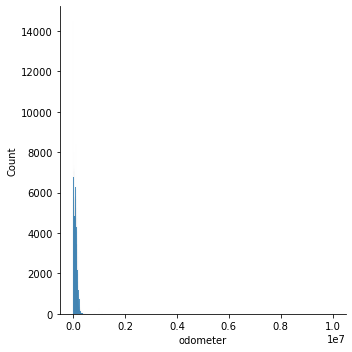

In [176]:
import seaborn as sns
sns.displot(df['odometer'].dropna())

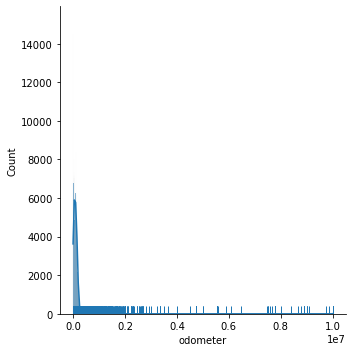

In [5]:
df = data.copy()
import seaborn as sns
sns.displot(df['odometer'].dropna(), kde=True, rug=True)

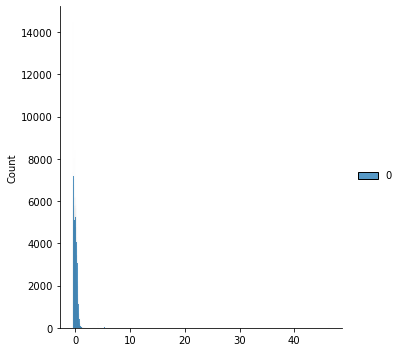

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfo_scaled = scaler.fit_transform(np.array(df['odometer'].dropna()).reshape(-1,1))
sns.displot(dfo_scaled)

In [163]:
df['odometer'].dropna().describe()

count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [182]:
(df['odometer']).max()

10000000.0

In [186]:
mean = (df['odometer'].dropna()).mean()
mean

98043.33144290854

In [187]:
std = (df['odometer'].dropna()).std()
std

213881.50079799347

In [234]:
outliers_upper_threshold = mean + 7*std
outliers_lower_threshold = mean - 3*std
print(outliers_upper_threshold)
print(outliers_lower_threshold)

1595213.837028863
-543601.1709510719


In [235]:
df['odometer'][df['odometer']>outliers_upper_threshold]

455        9999999.0
562        2222222.0
1397       9999999.0
1398       9999999.0
1399       9999999.0
             ...    
413267    10000000.0
417643     1710000.0
419355     2621720.0
419494     6090609.0
426106     9999999.0
Name: odometer, Length: 291, dtype: float64

In [192]:
df['odometer'][df['odometer']<outliers_lower_threshold]

Series([], Name: odometer, dtype: float64)

## Title Status
### to clean up
- ~95% status 'clean', consider change the rest into 'clean'
- or can create dummies isClean, isNotClean

In [193]:
df['title_status'].value_counts()

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

In [194]:
print(len(df['title_status'][df['title_status'].isnull()]))
print(len(df['title_status'][df['title_status'].isnull()]) / len(df['title_status']) * 100)

8242
1.9307533733133435


In [195]:
(df['title_status'].value_counts())/len(df['title_status'])*100

clean         94.901846
rebuilt        1.691108
salvage        0.906109
lien           0.333115
missing        0.190686
parts only     0.046383
Name: title_status, dtype: float64

## Transmission
### to clean up
- 79% automatic, 6% manual, 15% other
- isAutomatic and/or isManual

In [196]:
df['transmission'].value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

In [197]:
print(len(df['transmission'][df['transmission'].isnull()]))
print(len(df['transmission'][df['transmission'].isnull()]) / len(df['transmission']) * 100)

2556
0.5987631184407797


In [198]:
(df['transmission'].value_counts())/len(df['transmission'])*100

automatic    78.833396
other        14.683752
manual        5.884089
Name: transmission, dtype: float64

## VIN
### to drop
high cardinality

In [199]:
df['VIN'].value_counts()

1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
1G1PF5SC1C7189764      1
4S4BSAFC9F3247966      1
JN1EV7AP8JM365342      1
3FA6P0LU9LR226343      1
1C4PJMBS8FW599298      1
Name: VIN, Length: 118264, dtype: int64

## Drive
### to clean up
- 69% non-null
- 31% 4wd, 25% fwd, 14% rwd
- dummies is4wd, isfrwd

In [200]:
df['drive'].value_counts()

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

In [201]:
print(len(df['drive'][df['drive'].isnull()]))
print(len(df['drive'][df['drive'].isnull()]) / len(df['drive']) * 100)

130567
30.586347451274364


In [202]:
(df['drive'].value_counts())/len(df['drive'])*100

4wd    30.899550
fwd    24.718188
rwd    13.795915
Name: drive, dtype: float64

## Size
### to drop
- 72% null values

In [203]:
df['size'].value_counts()

full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: size, dtype: int64

In [205]:
print(len(df['size'][df['size'].isnull()]))
print(len(df['size'][df['size'].isnull()]) / len(df['size']) * 100)

306361
71.7674756371814


In [206]:
(df['size'].value_counts())/len(df['size'])*100

full-size      14.867176
mid-size        8.076274
compact         4.540855
sub-compact     0.748220
Name: size, dtype: float64

## Type
relevant categorical variable

In [207]:
df['type'].value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [209]:
(df['type'].value_counts())/len(df['type'])*100

sedan          20.393553
SUV            18.104385
pickup         10.192560
truck           8.264383
other           5.179442
coupe           4.498688
hatchback       3.888212
wagon           2.518506
van             2.002436
convertible     1.811048
mini-van        1.130294
offroad         0.142663
bus             0.121111
Name: type, dtype: float64

In [210]:
print(len(df['type'][df['type'].isnull()]))
print(len(df['type'][df['type'].isnull()]) / len(df['type']) * 100)

92858
21.752717391304348


## Paint_color
relevant categorical variable

In [211]:
df['paint_color'].value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

In [212]:
(df['paint_color'].value_counts())/len(df['paint_color'])*100

white     18.573135
black     14.725684
silver    10.066061
blue       7.314234
red        7.138540
grey       5.719640
green      1.720156
custom     1.569528
brown      1.544462
yellow     0.501780
orange     0.464768
purple     0.160935
Name: paint_color, dtype: float64

In [213]:
print(len(df['paint_color'][df['paint_color'].isnull()]))
print(len(df['paint_color'][df['paint_color'].isnull()]) / len(df['paint_color']) * 100)

130203
30.501077586206897


## Image_url
irrelevant variable

In [214]:
df['image_url'].value_counts()

https://images.craigslist.org/00N0N_1xMPvfxRAIdz_0gw0co_600x450.jpg    7357
https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg    2192
https://images.craigslist.org/01111_l590CdXzJSoz_001001_600x450.jpg     276
https://images.craigslist.org/01313_9Zne268YnWZz_0gw0co_600x450.jpg     231
https://images.craigslist.org/00X0X_1cMDo5xqSuAz_0gw0co_600x450.jpg     227
                                                                       ... 
https://images.craigslist.org/00b0b_1WLgzZRib4rz_0CI0t2_600x450.jpg       1
https://images.craigslist.org/00J0J_eIEybHbzes4z_0t20CI_600x450.jpg       1
https://images.craigslist.org/00j0j_7EarIyTb2r8z_0kE0fu_600x450.jpg       1
https://images.craigslist.org/00909_kmYMjGsQAhPz_0cT09G_600x450.jpg       1
https://images.craigslist.org/00202_23worLbTlf6z_05a03S_600x450.jpg       1
Name: image_url, Length: 241899, dtype: int64

In [215]:
print(len(df['image_url'][df['image_url'].isnull()]))
print(len(df['image_url'][df['image_url'].isnull()]) / len(df['image_url']) * 100)

68
0.015929535232383808


## Description
### Text-Mining

In [221]:
df['description']

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
426875    Carvana is the safer way to buy a car During t...
426876    Carvana is the safer way to buy a car During t...
426877    Carvana is the safer way to buy a car During t...
426878    Carvana is the safer way to buy a car During t...
426879    Carvana is the safer way to buy a car During t...
Name: description, Length: 426880, dtype: object

In [220]:
print(len(df['description'][df['description'].isnull()]))
print(len(df['description'][df['description'].isnull()]) / len(df['description']) * 100)

70
0.016398050974512746


## County
### to drop
- all nulls

In [223]:
df['county'].value_counts()

Series([], Name: county, dtype: int64)

## State
- no nulls
- relevant variable

In [225]:
len(df['state'].value_counts())

51

## Lat and Long
### for mapping

In [227]:
print(len(df['lat'][df['lat'].isnull()]))

6549


In [228]:
df['posting_date'].value_counts()

2021-04-23T22:13:05-0400    12
2021-04-22T20:32:05-0400    11
2021-04-13T13:19:15-0500    11
2021-04-16T12:07:56-0500    10
2021-04-29T20:06:09-0500     9
                            ..
2021-04-20T09:32:59-0400     1
2021-04-28T19:34:26-0600     1
2021-04-26T12:04:58-0500     1
2021-04-12T18:51:55-0700     1
2021-04-22T00:53:08-0500     1
Name: posting_date, Length: 381536, dtype: int64

## Posting Date

In [229]:
print(len(df['posting_date'][df['posting_date'].isnull()]))

68


In [233]:
df[df['posting_date'].isnull()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,region_clean
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN,prescott
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN,fayar
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN,keys
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN,worcester
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN,greensboro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368797,7316880457,https://dallas.craigslist.org/dal/cto/d/plano-...,dallas / fort worth,https://dallas.craigslist.org,7900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN,dallas
372596,7310515013,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN,elpaso
375886,7315179022,https://houston.craigslist.org/ctd/d/katy-07-f...,houston,https://houston.craigslist.org,7995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN,houston
402274,7291716547,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,25956,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN,bellingham
